In [1]:
import pandas as pd
import numpy as np

## Load speech file

In [2]:
# load data from pickle file
import pickle

pickle_in = open("speeches.pickle", "rb")
speech_df = pickle.load(pickle_in)

In [3]:
speech_df.head()

,type,speaker,date,speech
1789 inauguration George Washington,inauguration,George Washington,1789,Fellow-Citizens of the Senate and of the House...
1790 state_union George Washington,state_union,George Washington,1790,I embrace with great satisfaction the opportun...
1790 state_union George Washington,state_union,George Washington,1790,In meeting you again I feel much satisfaction ...
1791 state_union George Washington,state_union,George Washington,1791,I meet you upon the present occasion with the ...
1792 state_union George Washington,state_union,George Washington,1792,It is some abatement of the satisfaction with ...


In [4]:
speech_text = speech_df['speech']

## NMF - Max Features

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [6]:
t_vectorizer = TfidfVectorizer(
    stop_words="english",
    token_pattern="\\b[a-z][a-z]+\\b",
    max_df=0.9,
    min_df=0.05
)

# fit TFIDF on list of all speech text
t_vectorizer.fit(speech_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.05,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='\\b[a-z][a-z]+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [7]:
# transform vectorizer on list of all speech text
# output is TFIDF matrix of # docs x # word-features

t_counts = t_vectorizer.transform(speech_text)
t_counts.shape

(356, 5573)

In [8]:
from sklearn import decomposition

In [9]:
n_topics = 30

nmf = decomposition.NMF(
    n_components=n_topics,
    max_iter=5
)

# fit NMF model on TFIDF matrix
nmf.fit(t_counts)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=5,
  n_components=30, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [10]:
# define function to list each topic and its top words

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [11]:
print_top_words(nmf, t_vectorizer.get_feature_names(), 10)

Topic #0: congress year department report secretary general subject service attention law
Topic #1: america tonight americans let jobs work years children world families
Topic #2: world program economic federal congress farm development year programs security
Topic #3: world men free life freedom know human democracy let america
Topic #4: public commerce powers present object debt vessels effect objects spain
Topic #5: business law interstate ought public conditions work tariff corporations necessary
Topic #6: applause ve america let budget tonight congress iraq laughter year
Topic #7: constitution union shall public citizens state powers slavery laws rights
Topic #8: party republican platform democratic convention nomination republicans say campaign leadership
Topic #9: ve ll don soviet jobs oil world know didn fight
Topic #10: banks public treasury notes currency year gold silver credit expenditures
Topic #11: mexico texas congress treaty mexican minister territory treasury act state

Define topics

Topic #0: government admin  
congress year department report general secretary subject service attention present  

Topic #1: american people  
america tonight americans let jobs world work years children help  

Topic #2: econonmy  
economic program world federal congress farm development year programs military  

Topic #3: freedom  
world freedom free men let know life human man america  

Topic #4: noise  
public commerce powers object present spain effect debt objects vessels  

Topic #5: business  
business law interstate public ought conditions tariff work necessary corporations  

Topic #6: noise  
applause ve america let budget tonight congress iraq laughter year  

Topic #7: national unity  
constitution union shall citizens public laws powers state congress slavery  

Topic #8: campaign  
party republican platform democratic nomination convention republicans campaign say president  

Topic #9: noise  
ve ll soviet don jobs oil know world didn fight  

Topic #10: finance  
banks public treasury year currency notes credit congress banking recovery  

Topic #11: southwest territory  
mexico texas congress treaty mexican minister territory treasury act duties  

Topic #12: budget  
year billion budget help congress children tax percent health million  

Topic #13: war on terror  
iraq america terrorists terror terrorist freedom afghanistan world weapons americans  

Topic #14: noise  
bank general public paper subject notes means currency state indians  

Topic #15: noise  
shall oath america fighting japanese witnesses magistrate arrive men presence  

Topic #16: government action  
shall congress action measures session provision necessary regard executive public  

Topic #17: currency  
gold tariff silver notes cent products bonds cuba currency spain  

Topic #18: energy/econonmy  
energy programs federal percent oil spending congress strategic inflation years  

Topic #19: commitment  
vietnam tonight congress think years year commitments billion believe america  

Topic #20: enemy name-calling  
british enemy savages honorable prisoners savage rights public cruel proofs  

Topic #21: positive readiness  
freedom story seek men ready tasks help god courage hope  

Topic #22: spain territory  
spain treaty spanish islands catholic territory article cuba island state  

Topic #23: waterway issues  
british militia orders congress decrees harbors neutral vessels commerce ensuing  

Topic #24: achievement  
today generation learned journey let work achieve words democracy voices  

Topic #25: business  
democracy president business democratic reagan labor capital trade tariff laws  

Topic #26: treaty  
gentlemen commissioners france treaty philadelphia article french amity congress representatives  

Topic #27: people/society  
world continue agriculture civilization restoration citizens relationship economic want armaments  

Topic #28: nomination  
convention nomination measures foreign happiness public duties fellow nominated republican  

Topic #29: president  
president presidency friends office love prayers thank house family god

In [12]:
# save document/topic matrix to dataframe
df_topics = pd.DataFrame(nmf.transform(t_counts))

# export matrix to pickle file
pickle_out = open("topics.pickle", "wb")
pickle.dump(df_topics, pickle_out)
pickle_out.close()

In [14]:
df_topics.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.0,0.0,0.012555,0.027843,0.002302,0.0,0.058544,0.000000,0.0,...,0.070463,0.00000,0.0,0.000000,0.0,0.0,0.042177,0.000000,0.405272,0.007363
1,0.000000,0.0,0.0,0.000000,0.105852,0.004067,0.0,0.032762,0.000000,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.0,0.000000,0.140909,0.000000,0.0,0.000000,0.001995,0.0,...,0.000000,0.00105,0.0,0.070268,0.0,0.0,0.009993,0.049600,0.000000,0.000000
3,0.000000,0.0,0.0,0.000000,0.121443,0.016540,0.0,0.000000,0.000000,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.007991,0.000000,0.000000,0.000000
4,0.015756,0.0,0.0,0.000000,0.081382,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.00000,0.0,0.043682,0.0,0.0,0.052675,0.000045,0.000000,0.000000


In [15]:
rand_var = nmf.transform(t_counts)

In [16]:
rand_var[3]

array([0.        , 0.        , 0.        , 0.        , 0.12144251,
       0.01654045, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.32903341,
       0.        , 0.0764755 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00799147, 0.        , 0.        , 0.        ])

In [17]:
# greatest topic per document
np.argmax(rand_var, axis=1)

array([28, 14, 14, 14, 14, 16, 26, 27, 27, 27,  7, 27, 28, 27, 27, 27, 28,
       23,  4, 23, 23, 23,  7,  4, 23, 23, 20, 23, 23, 23, 23, 20, 20, 14,
       23,  4,  4, 22, 22,  4,  4,  4,  4,  4,  4, 28,  7, 28, 28, 28, 14,
       26, 14,  4,  4,  7, 28, 28, 28, 14,  7, 14, 14, 14, 10, 14,  7, 14,
       14, 11, 11, 11,  7, 11, 11, 11, 11, 26, 11, 11, 11,  7,  7, 11,  7,
        7,  7, 11, 11, 11,  7,  0,  7,  0,  0, 27,  0, 29,  7,  7,  7, 10,
       22,  7, 22,  0,  0,  0,  7,  0,  0,  0,  7, 10,  0,  0,  0, 16,  0,
        7,  0,  0,  0,  0, 26,  0, 17, 17,  0, 26,  0, 17, 17, 17, 17,  0,
       20,  0, 17, 17, 17, 16, 22, 22, 17, 22, 16,  5,  5, 22,  5,  3,  5,
        5,  5,  5,  5,  5, 28, 28, 28, 28,  3, 16, 16, 16, 20,  3, 16, 16,
       16, 16, 16, 10,  3, 16,  3,  5,  5,  5,  5,  5,  5,  5,  5,  2,  8,
       28,  3, 28, 10, 10,  8,  8, 28, 26, 10,  2, 25,  3, 25,  3, 25, 25,
        3,  3, 25,  3,  3, 15, 15, 15, 15, 15, 15, 24,  2,  2,  3,  8,  2,
        3,  2,  2,  2,  2

## TSNE

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
# NMF fit-transform on TFIDF matrix
# output is weights matrix of # docs x # topics

doc_top = nmf.fit_transform(t_counts)

In [81]:
doc_top.shape

(356, 30)

In [20]:
# output is vector of highest weighted topic for each document
# length is # docs

doc_max_top = np.argmax(doc_top, axis=1)

In [21]:
# TSNE fit-transform on weights matrix
# output is coordinate matrix of # docs x 2

from sklearn.manifold import TSNE

doc_plot = TSNE(verbose=1, metric="cosine").fit_transform(doc_top)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 356 samples in 0.000s...
[t-SNE] Computed neighbors for 356 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 356 / 356
[t-SNE] Mean sigma: 0.355158
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.701210
[t-SNE] Error after 1000 iterations: 0.516591


In [85]:
doc_plot

array([[-1.92496166e+01,  1.39430952e+00],
       [-1.42232122e+01,  9.68582034e-01],
       [-1.40018978e+01,  2.08494335e-01],
       [-1.43966103e+01,  5.51405013e-01],
       [-1.37515335e+01,  1.07500958e+00],
       [-1.37717524e+01,  1.72856295e+00],
       [ 1.87769043e+00,  7.30932379e+00],
       [-1.44776411e+01,  2.35453677e+00],
       [-1.33564854e+01,  1.04335749e+00],
       [-1.37550545e+01, -1.68812990e+00],
       [-1.91904774e+01,  4.51228738e-01],
       [-6.82359695e+00,  1.27692759e+00],
       [-2.05026875e+01, -4.09536093e-01],
       [-7.55524731e+00,  6.05473757e-01],
       [-6.70352364e+00,  1.36632645e+00],
       [-6.09478712e+00,  1.87546635e+00],
       [-1.98635139e+01, -4.89151329e-01],
       [-1.13040676e+01,  6.08641815e+00],
       [-1.02788839e+01,  6.33985472e+00],
       [-1.11959677e+01,  6.65225267e+00],
       [-1.06366634e+01,  6.73730659e+00],
       [-1.06107893e+01,  7.15259838e+00],
       [-2.04852142e+01,  6.03821516e-01],
       [-1.

In [22]:
doc_plot.shape

(356, 2)

Text(0.5,1,'tsne with max topic labels')

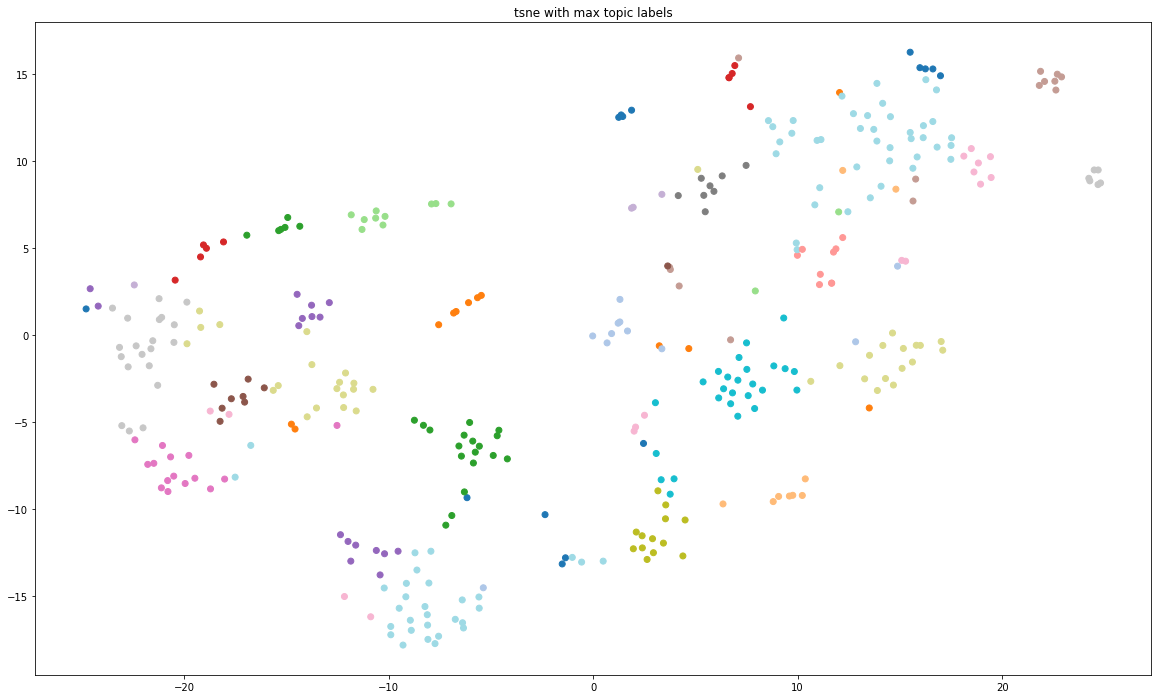

In [50]:
plt.figure(figsize=(20,12))
plt.scatter(doc_plot[:,0],doc_plot[:,1], c=doc_max_top, alpha=1, cmap=plt.cm.get_cmap('tab20_r', 30))
plt.title("tsne with max topic labels")


In [43]:
doc_max_top

array([ 4, 16,  4, 16, 16, 16, 15, 16, 16,  4,  4, 26,  7, 25, 26, 26,  3,
       21, 21, 21, 21, 21,  7, 21, 21, 23, 20, 23, 23, 23, 23, 20, 20, 14,
       23,  4,  4,  4, 11,  4,  4,  4,  4,  4,  4,  4,  7, 22, 22, 22,  4,
        7, 14,  4,  4,  7,  4, 25, 25, 14,  7, 14, 14, 14, 10, 14,  7, 10,
       14, 11, 11, 11,  7, 11, 11, 11, 11, 15, 11, 11, 11,  0,  7,  0, 11,
        7,  7, 11, 11, 11,  7,  0,  7, 27,  0, 28,  0, 29,  7,  7,  7, 10,
        0, 29,  0,  0,  0,  0, 27,  0,  0,  0,  7, 10,  0,  0,  0, 16,  0,
        7,  0,  0,  0,  0,  7,  0, 22, 28,  0,  7,  0, 22,  0, 22, 22,  0,
       20,  0, 17, 17, 17, 16, 17, 17, 17, 17, 17,  5,  5,  0,  5, 24,  5,
        5,  5,  5,  5,  5, 28,  0, 28,  0, 22, 22, 22, 22, 20, 22, 16, 22,
       22, 22, 22, 22, 24, 22, 24, 24,  5,  2,  5,  5, 24,  5,  2,  2,  8,
        2, 24, 28, 10, 10, 27,  8, 10, 27, 27,  2,  3, 27, 25,  3, 27, 25,
        3, 27, 25,  3,  3, 12, 12, 12, 27, 15, 14, 15,  2,  2,  3,  8,  2,
        2,  2,  2,  2,  2

In [60]:
import seaborn as sns
import matplotlib.patheffects as PathEffects

In [71]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 30))

    # We create a scatter plot.
    f = plt.figure(figsize=(20, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(30):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

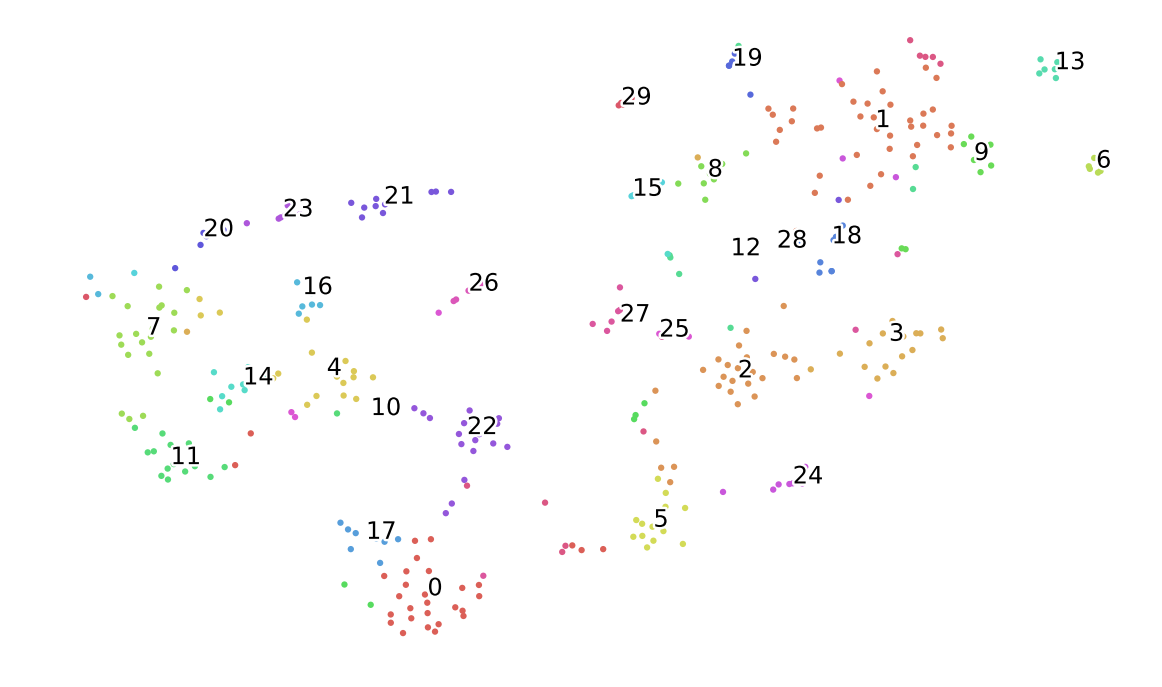

In [72]:
scatter(doc_plot, doc_max_top);

## Keyword cluster

In [73]:
pickle_in = open("keywords.pickle", "rb")
keywords_df = pickle.load(pickle_in)

In [93]:
# define normalized count matrix of # docs x # eng features

X = keywords_df.values
X.shape

(356, 4)

In [75]:
from sklearn.cluster import KMeans

In [99]:
from sklearn.metrics import silhouette_score

In [97]:
def get_cluster_centers(X, labels, k_num):
    CC_list = []
    for k in range(k_num):
        # get the mean coordinates of each cluster
        CC_list.append(np.mean(X[labels == k], axis = 0))
    return CC_list

# for each cluster substract the mean from each data point to get the error
# then get the magnitude of each error, square it, and sum it
def get_SSE(X, labels):
    k_num = len(np.unique(labels))
    CC_list = get_cluster_centers(X, labels, k_num)
    CSEs = []
    for k in range(k_num):
        # for each cluster of k we get the coordinates of how far off each point is to the cluster
        error_cords = X[labels == k] - CC_list[k]
        # square the coordinates and sum to get the magnitude squared
        error_cords_sq = error_cords ** 2
        error_mag_sq = np.sum(error_cords_sq, axis = 1)
        # since we already have the magnitude of the error squared we can just take the sum for the cluster
        CSE = np.sum(error_mag_sq)
        CSEs.append(CSE)
    # sum each cluster's sum of squared errors
    return sum(CSEs)

In [101]:
SSEs = []
Sil_coefs = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(X, labels, metric='euclidean'))
    SSEs.append(get_SSE(X, labels)) # The SSE is just inertia, we
                                            # could have just said km.inertia_

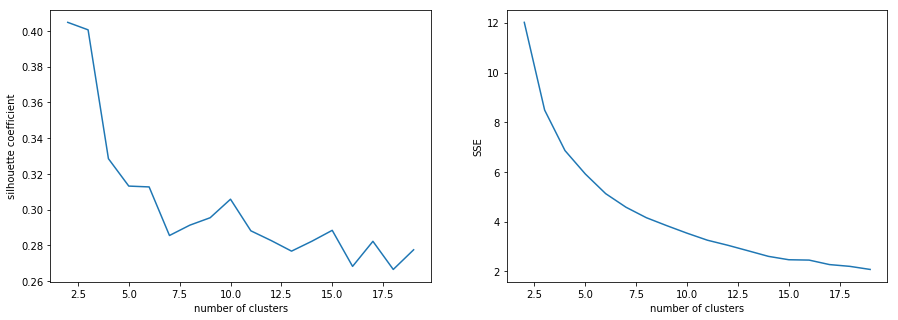

In [102]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,20)

# want higher values
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# want lower values
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [103]:
# run kmeans on optimal number of clusters
n = 5

kmeans = KMeans(n_clusters = n).fit(X)

In [104]:
# output is cluster ID matrix of # docs

kmeans.labels_

array([2, 2, 3, 1, 2, 1, 2, 1, 3, 1, 2, 1, 1, 4, 1, 3, 3, 4, 0, 4, 4, 4,
       1, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 1, 3, 4, 4, 1, 4, 4, 4, 1, 4,
       4, 4, 3, 4, 1, 4, 1, 2, 1, 4, 4, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 2, 3, 1, 2, 4, 4, 4, 4, 4, 4, 1, 2, 4, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 4, 3, 1, 4, 2, 1, 3, 1, 4, 1, 4, 4, 4, 4, 4, 4,
       1, 3, 4, 4, 3, 1, 4, 4, 4, 3, 1, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 0, 4, 0, 4, 3, 4, 2, 4, 0, 1, 1, 2, 3, 0,
       0, 0, 4, 3, 3, 4, 0, 4, 4, 4, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       4, 1, 3, 0, 4, 0, 2, 0, 3, 0, 0, 4, 0, 3, 4, 3, 0, 0, 3, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0,
       3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 4, 3, 3, 3, 0, 3, 0, 3,
       0, 3, 3, 0, 0, 3, 2, 2, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 4, 0, 0, 0, 3, 3, 3, 2, 3, 3,

In [105]:
# output is coordinate matrix of # clusters x # eng features

kmeans.cluster_centers_

array([[0.12143524, 0.67307898, 0.04189574, 0.16359004],
       [0.2279604 , 0.26627086, 0.05937437, 0.44639438],
       [0.44211258, 0.21791443, 0.11698892, 0.22298407],
       [0.24488564, 0.47851509, 0.08249742, 0.19410185],
       [0.13353701, 0.43176054, 0.03573698, 0.39896546]])

In [109]:
(kmeans.cluster_centers_).shape

(5, 4)

In [106]:
# output is matrix of # docs x # clusters

ktrans = kmeans.transform(X)

In [107]:
ktrans

array([[0.81946623, 0.52861682, 0.26040866, 0.58657865, 0.67114787],
       [0.55793574, 0.36007795, 0.28825253, 0.36194889, 0.42463314],
       [0.40940004, 0.26975648, 0.31349308, 0.23334126, 0.26792046],
       ...,
       [0.25707107, 0.46056506, 0.42246415, 0.18139775, 0.36895648],
       [0.16713767, 0.58041848, 0.6359152 , 0.32220262, 0.41658359],
       [0.19440816, 0.3371496 , 0.48257606, 0.19473959, 0.1535578 ]])

In [108]:
ktrans.shape

(356, 5)

In [110]:
kword_plot = TSNE(verbose=1, metric="cosine").fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 356 samples in 0.000s...
[t-SNE] Computed neighbors for 356 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 356 / 356
[t-SNE] Mean sigma: 0.068393
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.067085
[t-SNE] Error after 1000 iterations: 0.429132


Text(0.5,1,'tsne with max topic labels')

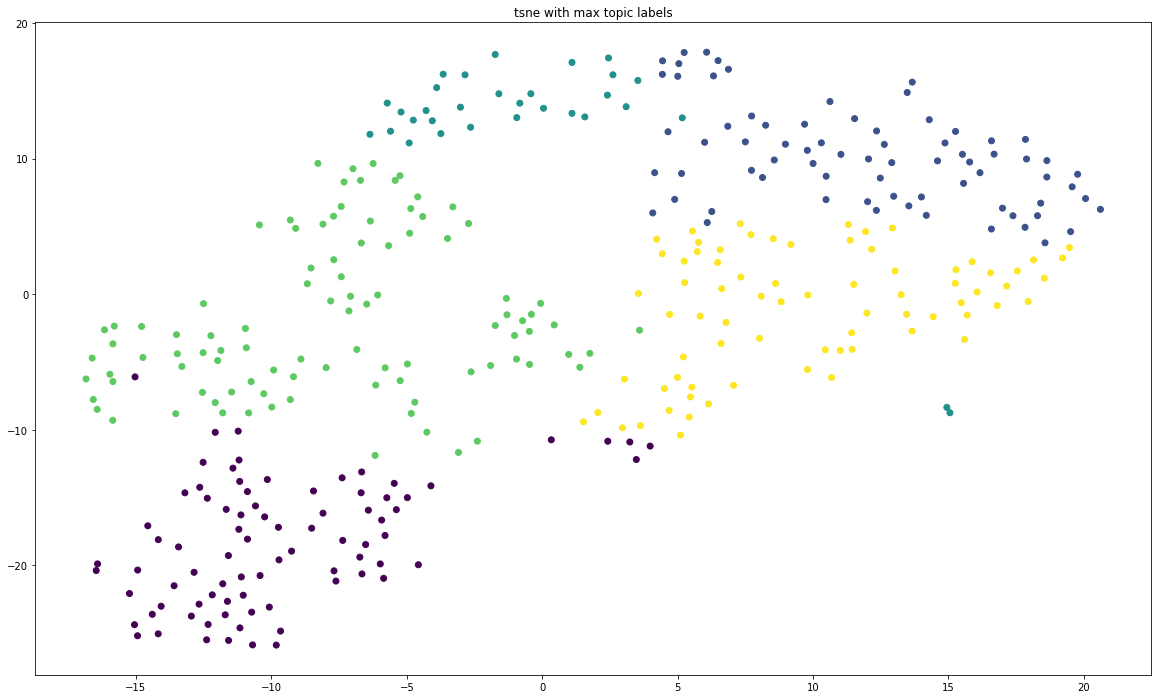

In [111]:
plt.figure(figsize=(20,12))
plt.scatter(kword_plot[:,0],kword_plot[:,1], c=(kmeans.labels_), alpha=1)
plt.title("tsne with max topic labels")